In [1]:
import requests 
import json
import pandas as pd
import warnings
import pyecharts as pe

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "/Users/chaozy/anaconda3/lib/python3.6/site-packages/lml/utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [2]:
# GET Access Token
host = 'https://aip.baidubce.com/oauth/2.0/token?grant_type=client_credentials&client_id=E52brsYEkEv9bG7xwqecY64S&client_secret=BAaNBmr3gV7PHIfMFbYBd3QVfT4sFQC9'
response = requests.get(host)
if response:
    access_token = response.json()['access_token']
# Fill in header parameters
headers = {'content-type': 'application/json'}

# 生成url
url_sentiment_classify = 'https://aip.baidubce.com/rpc/2.0/nlp/v1/sentiment_classify?charset=UTF-8&access_token=' +  access_token

In [3]:
with open("SunYung.txt", 'r') as file:
    data = file.read().replace('\n', '')
data

'孙杨的事情，还没有结束。最近，他的妈妈杨明，也被卷进了舆论风波中。在国际体育仲裁法庭宣布孙杨禁赛八年后，爱子心切的孙妈妈，在朋友圈发了一条长文。文章开头，就在哭诉儿子的不容易。之后，她就开始指责领导的不负责，指派律师的不专业。首先，她表明孙杨在08年因为身体不适服用了含有盐酸曲美他嗪的“万爽力。”当时，这药物还未变成“赛内禁用，赛外可用”的违禁药。直到过了6年，中国反兴奋剂网站才下发通知，表明“万爽力”是违禁药，强调运动员对此是毫不知情。当年不知情的孙杨，还是正常使用了“万爽力”，没想到体检是阳性，为此还被口头警告，要求罚款5000元。对于自己被“冤枉”，孙杨当然是不乐意的。但是在领导说出“不会影响成绩”后，孙杨妈妈选择先把这件事情放下，让儿子继续比赛。孙杨，也这么做了。听话的后果，就让这件事成为了“孙杨职业生涯最大的耻辱柱。”再之后参加国际听证会和仲裁会，孙杨妈妈也认为领导指派的律师专业性十分不强，影响了最终结果的判断，导致了自己儿子被禁赛8年的事情发生。整篇文章看下来，可以看出孙杨妈妈的不甘和怒气。也能看出，她意在把事情的全部责任，都推卸到别人身上。但是，真相似乎并不像孙杨妈妈所指的一样，孙杨被禁赛长达8年，只有别人的责任，自己毫无问题。前不久，有人在网上放出了孙杨妈妈在听证会的一段视频曝光。在听证会上，孙杨妈妈一直不愿正面回答对方提出的问题。并且不顾规则，总是中途打断对方，浪费了许多时间。法官问了三遍“孙杨是否撕毁了他之前签字的检验单？”孙杨妈妈是承认了，但却一直解释，自己儿子的暴力抗检，是“有理有据。”明明是回答是或者不是的问题，孙杨妈妈却一直自说自话，胡乱辩解。直到她的证词时间已经结束了，她还要强调“我还没说完。”不听安排，无视规则。而且据爆料，孙杨妈妈在去年6月，还曾私下联系过血检官和尿检官。这些，都是WADA明令禁止的。这一系列操作看下来，孙杨妈妈对于整件事而言，没有任何正面帮助，还帮了倒忙。在孙杨的成长道路，运动员生涯中，最离不开和最常见到的身影，就是他的妈妈杨明。作为曾经的浙江女排主力，专业的运动员，杨明深知运动员锻炼时间的重要性。在孙杨小时候，杨明是风雨无阻开车送儿子去训练，完全没有自我时间。为了让孩子把一切时间运用在游泳上，杨明更是把孙杨当成了“巨婴”去养。小学六年级，孙杨还不会系鞋带，上学训练也是从不背书包。在杨明的眼里，这些都是小事，什么

In [4]:
# Split the file
sentenceList = data.split('。')
sentenceList

['孙杨的事情，还没有结束',
 '最近，他的妈妈杨明，也被卷进了舆论风波中',
 '在国际体育仲裁法庭宣布孙杨禁赛八年后，爱子心切的孙妈妈，在朋友圈发了一条长文',
 '文章开头，就在哭诉儿子的不容易',
 '之后，她就开始指责领导的不负责，指派律师的不专业',
 '首先，她表明孙杨在08年因为身体不适服用了含有盐酸曲美他嗪的“万爽力',
 '”当时，这药物还未变成“赛内禁用，赛外可用”的违禁药',
 '直到过了6年，中国反兴奋剂网站才下发通知，表明“万爽力”是违禁药，强调运动员对此是毫不知情',
 '当年不知情的孙杨，还是正常使用了“万爽力”，没想到体检是阳性，为此还被口头警告，要求罚款5000元',
 '对于自己被“冤枉”，孙杨当然是不乐意的',
 '但是在领导说出“不会影响成绩”后，孙杨妈妈选择先把这件事情放下，让儿子继续比赛',
 '孙杨，也这么做了',
 '听话的后果，就让这件事成为了“孙杨职业生涯最大的耻辱柱',
 '”再之后参加国际听证会和仲裁会，孙杨妈妈也认为领导指派的律师专业性十分不强，影响了最终结果的判断，导致了自己儿子被禁赛8年的事情发生',
 '整篇文章看下来，可以看出孙杨妈妈的不甘和怒气',
 '也能看出，她意在把事情的全部责任，都推卸到别人身上',
 '但是，真相似乎并不像孙杨妈妈所指的一样，孙杨被禁赛长达8年，只有别人的责任，自己毫无问题',
 '前不久，有人在网上放出了孙杨妈妈在听证会的一段视频曝光',
 '在听证会上，孙杨妈妈一直不愿正面回答对方提出的问题',
 '并且不顾规则，总是中途打断对方，浪费了许多时间',
 '法官问了三遍“孙杨是否撕毁了他之前签字的检验单？”孙杨妈妈是承认了，但却一直解释，自己儿子的暴力抗检，是“有理有据',
 '”明明是回答是或者不是的问题，孙杨妈妈却一直自说自话，胡乱辩解',
 '直到她的证词时间已经结束了，她还要强调“我还没说完',
 '”不听安排，无视规则',
 '而且据爆料，孙杨妈妈在去年6月，还曾私下联系过血检官和尿检官',
 '这些，都是WADA明令禁止的',
 '这一系列操作看下来，孙杨妈妈对于整件事而言，没有任何正面帮助，还帮了倒忙',
 '在孙杨的成长道路，运动员生涯中，最离不开和最常见到的身影，就是他的妈妈杨明',
 '作为曾经的浙江女排主力，专业的运动员，杨明深知运动员锻炼时间的

In [6]:
def sentiment_ana(data):
    # perform word analysis on this article
    response = requests.post(url_sentiment_classify, 
        data = json.dumps({'text': data}),    # news变量写在这里
        headers = headers)
    if response:
        print(response.json())
        result = response.json()['items'][0]['negative_prob']
        return result
        
sentiment_ana(sentenceList[0])

{'log_id': 6908174465870232398, 'text': '孙杨的事情，还没有结束', 'items': [{'positive_prob': 0.0471634, 'confidence': 0.895192, 'negative_prob': 0.952837, 'sentiment': 0}]}


0.952837

In [7]:
def fullText_sentiment_ana(dataList):
    displayList = []
    for sentence in dataList:
        try:
            displayList.append({"Sentence" : sentence, "nega_prob" : sentiment_ana(sentence)})
        except:
            continue
    return displayList
lis = fullText_sentiment_ana(sentenceList)

{'log_id': 3065841128774131950, 'text': '孙杨的事情，还没有结束', 'items': [{'positive_prob': 0.0471634, 'confidence': 0.895192, 'negative_prob': 0.952837, 'sentiment': 0}]}
{'log_id': 2159532102450637870, 'text': '最近，他的妈妈杨明，也被卷进了舆论风波中', 'items': [{'positive_prob': 0.837234, 'confidence': 0.638299, 'negative_prob': 0.162765, 'sentiment': 2}]}
{'error_code': 18, 'error_msg': 'Open api qps request limit reached'}
{'error_code': 18, 'error_msg': 'Open api qps request limit reached'}
{'error_code': 18, 'error_msg': 'Open api qps request limit reached'}
{'error_code': 18, 'error_msg': 'Open api qps request limit reached'}
{'error_code': 18, 'error_msg': 'Open api qps request limit reached'}
{'error_code': 18, 'error_msg': 'Open api qps request limit reached'}
{'log_id': 621687831140493518, 'text': '当年不知情的孙杨，还是正常使用了“万爽力”，没想到体检是阳性，为此还被口头警告，要求罚款5000元', 'items': [{'positive_prob': 0.000692392, 'confidence': 0.998461, 'negative_prob': 0.999308, 'sentiment': 0}]}
{'log_id': 3710366521347611438, 'text': '对于自

{'error_code': 18, 'error_msg': 'Open api qps request limit reached'}
{'error_code': 18, 'error_msg': 'Open api qps request limit reached'}
{'error_code': 18, 'error_msg': 'Open api qps request limit reached'}
{'error_code': 18, 'error_msg': 'Open api qps request limit reached'}
{'log_id': 429898653365932014, 'text': '29岁的孙杨，也应该明白，人生除了比赛，还有做人', 'items': [{'positive_prob': 0.854954, 'confidence': 0.677675, 'negative_prob': 0.145046, 'sentiment': 2}]}
{'log_id': 8509066268291991246, 'text': '奥运冠军的光环，不可能罩着你一辈子', 'items': [{'positive_prob': 0.0360475, 'confidence': 0.919894, 'negative_prob': 0.963952, 'sentiment': 0}]}
{'error_code': 18, 'error_msg': 'Open api qps request limit reached'}


In [41]:
# Put the analysis result into a table
ana_table = pd.DataFrame(lis)
ana_table


,Sentence,nega_prob
0,孙杨的事情，还没有结束,0.952837
1,最近，他的妈妈杨明，也被卷进了舆论风波中,0.162765
2,但是在领导说出“不会影响成绩”后，孙杨妈妈选择先把这件事情放下，让儿子继续比赛,0.119193
3,孙杨，也这么做了,0.658172
4,并且不顾规则，总是中途打断对方，浪费了许多时间,0.999930
5,法官问了三遍“孙杨是否撕毁了他之前签字的检验单？”孙杨妈妈是承认了，但却一直解释，自己儿子的...,0.999097
6,直到她的证词时间已经结束了，她还要强调“我还没说完,0.959724
7,”不听安排，无视规则,0.998993
8,这一系列操作看下来，孙杨妈妈对于整件事而言，没有任何正面帮助，还帮了倒忙,0.370259
9,在孙杨的成长道路，运动员生涯中，最离不开和最常见到的身影，就是他的妈妈杨明,0.000293


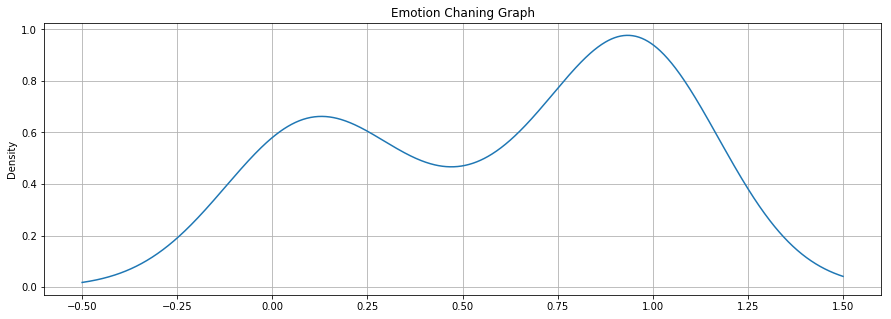

In [44]:
# DRAW the emotion changing graph
ana_table["nega_prob"].plot(title="Emotion Chaning Graph", figsize=(15, 5), kind="kde", grid=True)